# Chapter 20: Text mining

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition)
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

Make sure DMBA package is available

In [2]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB/s eta 0:00:006.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 kB 6.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /home/alago/.local/share/pipx/venvs/jupyterlab/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.





- **Library Imports**: Each library or module is imported for a specific purpose, mostly related to text processing, machine learning, and data visualization.
- **NLTK Download**: Downloads the Punkt tokenizer model for splitting text into individual words. This is essential for the tokenization process in NLTK.
- **Matplotlib Inline**: `%matplotlib inline` is specific to Jupyter Notebooks, allowing plots to be shown inline. This line is not necessary if running outside of Jupyter.

This setup prepares you for a text mining pipeline that includes:
1. Reading and processing text data.
2. Transforming text data into a numeric form.
3. Reducing the dimensionality of the data using LSA.
4. Fitting a logistic regression model to predict labels based on text.
5. Using custom functions for data summaries and visualization.

Each step in this code sets up necessary libraries and tools to perform these actions.

In [29]:
# Importing necessary libraries for file handling, data processing, machine learning, and text processing
from pathlib import Path  # To handle file paths
from zipfile import ZipFile  # To work with zip files
import pandas as pd  # Data manipulation library
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to a bag-of-words model
from sklearn.feature_extraction.text import TfidfTransformer  # To apply TF-IDF transformation on bag-of-words model
from sklearn.decomposition import TruncatedSVD  # For dimensionality reduction, used here for LSA
from sklearn.preprocessing import Normalizer  # To normalize the data after SVD
from sklearn.pipeline import make_pipeline  # To create a pipeline that applies multiple transformations in sequence
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification
import nltk  # Natural Language Toolkit for text processing
from nltk import word_tokenize  # For tokenizing text data into words
from nltk.stem.snowball import EnglishStemmer  # For stemming English words to their root forms
import matplotlib.pylab as plt  # For data visualization

# Importing additional functions from the dmba library, possibly custom to the user environment
import dmba
from dmba import printTermDocumentMatrix, classificationSummary, liftChart  # Specific dmba functions

# Downloading the Punkt tokenizer models, necessary for word tokenization in NLTK
nltk.download('punkt')
nltk.download('punkt_tab')

# Setting up inline plotting for Jupyter Notebook; displays plots directly below code cells
%matplotlib inline



[nltk_data] Downloading package punkt to /home/alago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/alago/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Term-document representation of words in sentences S1-S3


**Question 1:**

You are given the following three sentences, and your task is to construct a term-document matrix based on these sentences using the `CountVectorizer` from `scikit-learn`. The matrix should display each unique word across the sentences, with each cell showing the count of the word’s occurrence in that sentence.

Sentences:
1. "this is the first sentence."
2. "this is a second sentence."
3. "the third sentence is here."

**Steps:**
1. Identify all unique words across the sentences.
2. For each sentence, count how often each unique word appears.
3. Construct the term-document matrix, where rows represent words and columns represent sentences (S1, S2, S3).

**Hints:**
- Use `CountVectorizer` to automatically tokenize and count each word.
- `printTermDocumentMatrix` is a helpful function that can format your matrix for easy viewing.
- Remember to remove any punctuation and convert words to lowercase for consistency.



In [14]:
# Sample text data: three sentences to be represented in a term-document matrix
text = [
    'this is the first sentence.',
    'this is a second sentence.',
    'the third sentence is here.'
]

# write code here
count_vect = CountVectorizer()
tfidTransformer = TfidfTransformer(smooth_idf=False, norm=None)
counts = count_vect.fit_transform(text)
tfid = tfidTransformer.fit_transform(counts)

printTermDocumentMatrix(count_vect, tfid)



                S1        S2        S3
first     2.098612  0.000000  0.000000
here      0.000000  0.000000  2.098612
is        1.000000  1.000000  1.000000
second    0.000000  2.098612  0.000000
sentence  1.000000  1.000000  1.000000
the       1.405465  0.000000  1.405465
third     0.000000  0.000000  2.098612
this      1.405465  1.405465  0.000000


**Question 2:**

You are given four sentences with mixed casing and special characters. Your task is to construct a term-document matrix based on these sentences using `CountVectorizer` in Python. The matrix should display each unique word across the sentences, with each cell showing the count of that word’s occurrence in each sentence.

Sentences:
1. "this is the first sentence!!"
2. "this is a second Sentence :)"
3. "the third sentence, is here"
4. "forth of all sentences"

**Steps:**
1. **Identify the unique words** that will appear as columns in the matrix.
2. **Construct the term-document matrix**, ensuring that punctuation is ignored and text is treated as lowercase.
3. **Analyze the output** to check if any special characters or mixed cases affected the word counting.

**Hints:**
- By default, `CountVectorizer` will convert all words to lowercase and remove punctuation.
- Each row in the output should represent a unique word, while each column represents a sentence (S1, S2, S3, S4).
- Use `printTermDocumentMatrix` to view the matrix in an organized format.



In [16]:
# Sample text data: Four sentences with special characters and mixed casing
text = [
    'this is the first sentence!!',         # S1
    'this is a second Sentence :)',         # S2
    'the third sentence, is here ',         # S3
    'forth of all sentences'                # S4
]


# write code here

count_vect = CountVectorizer()
tfidTransformer = TfidfTransformer(smooth_idf=False, norm=None)
counts = count_vect.fit_transform(text)
tfid = tfidTransformer.fit_transform(counts)

printTermDocumentMatrix(count_vect, tfid)

                 S1        S2        S3        S4
all        0.000000  0.000000  0.000000  2.386294
first      2.386294  0.000000  0.000000  0.000000
forth      0.000000  0.000000  0.000000  2.386294
here       0.000000  0.000000  2.386294  0.000000
is         1.287682  1.287682  1.287682  0.000000
of         0.000000  0.000000  0.000000  2.386294
second     0.000000  2.386294  0.000000  0.000000
sentence   1.287682  1.287682  1.287682  0.000000
sentences  0.000000  0.000000  0.000000  2.386294
the        1.693147  0.000000  1.693147  0.000000
third      0.000000  0.000000  2.386294  0.000000
this       1.693147  1.693147  0.000000  0.000000



### **Question 3:**

You are given a set of four sentences with special characters and varied formatting. Your task is to create a term-document matrix using `CountVectorizer` with a custom token pattern that treats special characters as part of the tokens.

Sentences:
1. "This is the first     sentence!!"
2. "this is a second Sentence :)"
3. "the third sentence, is here "
4. "forth of all sentences"

**Steps:**
1. **Identify Tokens**: Review the token pattern `[a-zA-Z!:)]+` and determine which words and symbols will be considered as tokens.
2. **Generate the Term-Document Matrix**: Use `CountVectorizer` with the custom token pattern to build the term-document matrix.
3. **Analyze the Output**: Interpret how different words and special characters are counted in each sentence.

**Hints:**
- The token pattern `[a-zA-Z!:)]+` includes alphabetical characters, exclamation marks (`!`), colons (`:`), and parentheses (`)`).
- Each token is treated as a single entity, even if it contains special characters.


In [18]:
# Sample text data with special characters and varied formatting
text = [
    'this is the first     sentence!!',      # S1
    'this is a second Sentence :)',          # S2
    'the third sentence, is here ',          # S3
    'forth of all sentences'                 # S4
]

# write code here

count_vect = CountVectorizer(token_pattern='[a-zA-Z!:)]+')
counts = count_vect.fit_transform(text)

printTermDocumentMatrix(count_vect, counts)





            S1  S2  S3  S4
:)           0   1   0   0
a            0   1   0   0
all          0   0   0   1
first        1   0   0   0
forth        0   0   0   1
here         0   0   1   0
is           1   1   1   0
of           0   0   0   1
second       0   1   0   0
sentence     0   1   1   0
sentence!!   1   0   0   0
sentences    0   0   0   1
the          1   0   1   0
third        0   0   1   0
this         1   1   0   0


### **Question 4: Exploring Stopwords in Text Processing**

**Objective:** Understand the role of stopwords in text preprocessing and how they can impact the analysis of textual data.

**Question:**

1. **Reviewing Stopwords**: Examine the list of English stopwords displayed in the output above.
   - How many stopwords are included in scikit-learn’s default set?
   - Why might certain words, like "above," "below," and "upon," be considered stopwords?

2. **Impact on Text Analysis**:
   - Discuss how removing these stopwords could change the outcome of a text analysis or classification task. Provide examples of when removing stopwords might be beneficial and when it might not be helpful.
   
3. **Customization**:
   - Imagine you are analyzing a dataset where words like "data" and "science" appear frequently but add little value to your analysis.
     - How would you modify the stopword list in scikit-learn to include additional words that are specific to your task?

**Hint:**
- Stopwords are commonly used words that do not carry specific meaning in analysis and are often removed to reduce noise in data. Think about examples in real text data where removing words might help highlight important terms.



In [22]:
# Importing the default list of English stopwords from scikit-learn
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# write code here
stopWords = list(sorted(ENGLISH_STOP_WORDS))
print(stopWords)







['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give

### **Question 5: Exploring Text Reduction Using Stemming and Stopwords**

**Objective:** Understand the process and effect of stemming and stopword removal in text preprocessing.

**Questions:**

1. **Stemming and Stopword Removal**:
   - Explain what the terms "stemming" and "stopword removal" mean in the context of text preprocessing. Why are these steps commonly used in natural language processing?

2. **Analyzing the Output Matrix**:
   - Look at the term-document matrix produced after stemming and stopword removal. Notice that words like "first," "this," and common words (stopwords) have been removed.
   - How does stemming affect the words in this matrix? For example, what changes might occur to the word “sentences”?

3. **Modifying the Preprocessor**:
   - If you wanted to include specific words (such as “first” or “all”) in the analysis despite them being common, how would you modify the `LemmaTokenizer` class to remove these words from the stopword list?

4. **Effects on Analysis**:
   - Discuss how stemming and stopword removal could impact the analysis, especially when comparing this matrix to one where stopwords and stemming are not applied.

**Hints**:
- Remember that stemming reduces words to their base forms (e.g., “running” to “run”).
- Stopwords are words that are often removed in text analysis because they don’t add unique meaning to the dataset.



In [30]:
# Importing English stopwords from scikit-learn
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from nltk import word_tokenize  # Importing word_tokenize for tokenizing the text
from nltk.stem.snowball import EnglishStemmer  # Importing the English stemmer for stemming words

# Sample text data with mixed casing and punctuation
text = [
    'this is the first     sentence!! ',   # S1
    'this is a second Sentence :)',        # S2
    'the third sentence, is here ',        # S3
    'forth of all sentences'               # S4
]

# Create a custom tokenizer class that will apply stemming and remove stopwords
# write code here
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = ENGLISH_STOP_WORDS

    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

count_vect = CountVectorizer(tokenizer=LemmaTokenizer())
counts = count_vect.fit_transform(text)

printTermDocumentMatrix(count_vect, counts)

         S1  S2  S3  S4
forth     0   0   0   1
second    0   1   0   0
sentenc   1   1   1   1



### **Question 6: Understanding TF-IDF Matrix for Text Data**

**Objective:** Understand how the TF-IDF matrix represents the importance of terms within documents and apply this concept to analyze a sample dataset.

**Questions:**

1. **Basic Concept**:
   - What does the TF-IDF value represent for a term in a specific document?
   - Why might a term have a higher TF-IDF value in one document compared to another?

2. **Analyzing the Matrix**:
   - Look at the values in the TF-IDF matrix for the terms "first," "sentence," and "here."
   - Explain why these terms have different TF-IDF scores across sentences S1 to S4.
   - Identify any term with the same TF-IDF score across all sentences. What might this indicate about the term’s presence across the sentences?

3. **Effects of Parameter Settings**:
   - The code specifies `smooth_idf=False` and `norm=None`. Discuss how changing these parameters might affect the TF-IDF values. (Hint: Smoothing helps handle terms that are missing in some documents, and normalization scales TF-IDF values to make comparisons easier.)

4. **Real-World Application**:
   - Consider how TF-IDF could be helpful in filtering out common but less informative terms in a large dataset. How could this matrix be used in applications like document classification or information retrieval?

**Hints**:
- Remember, a higher TF-IDF score indicates that a term is more unique to a particular document in the dataset.
- Terms that appear in all documents tend to have lower scores, as they are less useful for distinguishing documents from each other.


In [ ]:
# Sample text data with special characters and different formatting
text = [
    'this is the first     sentence!!',      # S1
    'this is a second Sentence :)',          # S2
    'the third sentence, is here ',          # S3
    'forth of all sentences'                 # S4
]
# write code here











                 S1        S2        S3        S4
all        0.000000  0.000000  0.000000  2.386294
first      2.386294  0.000000  0.000000  0.000000
forth      0.000000  0.000000  0.000000  2.386294
here       0.000000  0.000000  2.386294  0.000000
is         1.287682  1.287682  1.287682  0.000000
of         0.000000  0.000000  0.000000  2.386294
second     0.000000  2.386294  0.000000  0.000000
sentence   1.287682  1.287682  1.287682  0.000000
sentences  0.000000  0.000000  0.000000  2.386294
the        1.693147  0.000000  1.693147  0.000000
third      0.000000  0.000000  2.386294  0.000000
this       1.693147  1.693147  0.000000  0.000000


##**Example: Online Discussions on Autos and Electronics**

This example6 illustrates a classification task—to classify Internet discussion posts as either auto-related or electronics-related. One post looks like this:

From: smith@logos.asd.sgi.com (Tom Smith) Subject: Ford Explorer 4WD - do I need performance axle?

We’re considering getting a Ford Explorer XLT with 4WD and we have the following questions (All we would do is go skiing - no off-roading):

1. With 4WD, do we need the “performance axle” - (limited slip axle). Its purpose is to allow the tires to act independently when the tires are on different terrain.

2. Do we need the all-terrain tires (P235/75X15) or will the all-season (P225/70X15) be good enough for us at Lake Tahoe?

Thanks,

Tom

–

================================================

Tom Smith Silicon Graphics smith@asd.sgi.com 2011 N. Shoreline Rd. MS 8U-815 415-962-0494 (fax) Mountain View, CA 94043

================================================

The posts are taken from Internet groups devoted to autos and electronics, so are pre-labeled. This one, clearly, is auto-related. A related organizational scenario might involve messages received by a medical office that must be classified as medical or non-medical (the messages in such a real scenario would probably have to be labeled by humans as part of the preprocessing).

The posts are in the form a zipped file that contains two folders: auto posts and electronics posts, each contains a set of 1000 posts organized in small files. In the following, we describe the main steps from preprocessing to building a classification model on the data. Table 20.7 provides Python code for the text processing step for this example. We describe each step separately next.



## Table 20.7 Importing and labeling the records, preprocessing text, and producing concept matrix

The ZipFile module in the standard library of Python is used to read the individual documents in the zipped datafile. We additionally create a label array that corresponds to the order of the documents—we will use “1” for autos and “0” for electronics. The assignment is based on the file path.

In [ ]:
# Step 1: Import and label records
corpus = []  # Initialize a list to store text data from each file
label = []   # Initialize a list to store labels for each document (1 for autos, 0 for electronics)

# Open the zipped data file containing documents for 'rec.autos' and 'comp.sys.electronics'
with ZipFile(dmba.get_data_file('AutoAndElectronics.zip')) as rawData:
    for info in rawData.infolist():  # Loop over each file in the archive
        if info.is_dir():  # Skip directories, as we only want files
            continue
        # Assign a label of 1 if the file is from 'rec.autos', otherwise assign 0 (for 'comp.sys.electronics')
        label.append(1 if 'rec.autos' in info.filename else 0)
        # Read the file content and add it to the corpus list
        corpus.append(rawData.read(info))

# Step 2: Preprocessing (Tokenization, Stemming, and Stopword Removal)

# Define a custom tokenizer class that includes stemming and stopword removal
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()  # Initialize an English stemmer for reducing words to their base form
        self.stopWords = set(ENGLISH_STOP_WORDS)  # Use a predefined set of English stopwords

    def __call__(self, doc):
        # Tokenize the document, apply stemming, and remove stopwords and non-alphabetic tokens
        return [self.stemmer.stem(t) for t in word_tokenize(doc)
                if t.isalpha() and t not in self.stopWords]

# Create a CountVectorizer instance with the custom tokenizer and set encoding
preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')

# Apply the preprocessing steps (tokenization, stopword removal, stemming) and fit-transform the corpus
preprocessedText = preprocessor.fit_transform(corpus)


/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Summary of Code Steps:**

**1. Data Loading and Labeling:** Extracts and labels each document based on its source ('rec.autos' vs. 'comp.sys.electronics') and reads the document content into a list.

**2. Preprocessing:**

*   Tokenization: Breaks down documents into individual words.
*   Stemming: Reduces words to their root form (e.g., "cars" becomes "car").
*   Stopword Removal: Removes common English stopwords (like "and", "the") that are often not informative for classification.

**3. Vectorization:** Converts the preprocessed text into a structured matrix format (bag-of-words), suitable for further analysis or modeling.

In [ ]:
# Step 3: TF-IDF and Latent Semantic Analysis (LSA)

# Initialize a TF-IDF transformer to convert the count-based term matrix into TF-IDF (Term Frequency-Inverse Document Frequency)
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)
# The TF-IDF representation gives higher weight to terms that are significant in a document but less common across the entire corpus.

# Initialize TruncatedSVD for dimensionality reduction, targeting 20 latent concepts
svd = TruncatedSVD(20)  # Extracts 20 latent "concepts" based on word co-occurrences

# Initialize a normalizer to ensure that the LSA-transformed vectors have unit length
normalizer = Normalizer(copy=False)

# Create a pipeline that first applies SVD for dimensionality reduction, then normalizes the result
lsa = make_pipeline(svd, normalizer)

# Apply the LSA pipeline to the TF-IDF representation to get the transformed LSA feature matrix
lsa_tfidf = lsa.fit_transform(tfidf)


Here's a breakdown with comments for this additional code:

```python
# Step 3: TF-IDF and Latent Semantic Analysis (LSA)

# Initialize a TF-IDF transformer to convert the count-based term matrix into TF-IDF (Term Frequency-Inverse Document Frequency)
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)
# The TF-IDF representation gives higher weight to terms that are significant in a document but less common across the entire corpus.

# Initialize TruncatedSVD for dimensionality reduction, targeting 20 latent concepts
svd = TruncatedSVD(20)  # Extracts 20 latent "concepts" based on word co-occurrences

# Initialize a normalizer to ensure that the LSA-transformed vectors have unit length
normalizer = Normalizer(copy=False)

# Create a pipeline that first applies SVD for dimensionality reduction, then normalizes the result
lsa = make_pipeline(svd, normalizer)

# Apply the LSA pipeline to the TF-IDF representation to get the transformed LSA feature matrix
lsa_tfidf = lsa.fit_transform(tfidf)
```

### Summary of Code Steps:
1. **TF-IDF Transformation**:
   - Converts the raw term counts to a TF-IDF matrix, which weighs terms based on their frequency within a document and inversely with their frequency across all documents. This transformation helps to reduce the influence of very common terms and highlights terms that are more informative within each document.

2. **Latent Semantic Analysis (LSA)**:
   - **Truncated SVD**: Reduces the dimensionality of the TF-IDF matrix by extracting the most significant components (in this case, 20), which represent underlying "concepts" in the data.
   - **Normalization**: Ensures that each document vector has unit length, which can improve performance in downstream analyses by standardizing the feature magnitudes.
   - The resulting `lsa_tfidf` matrix now represents each document in terms of the 20 extracted concepts, capturing underlying patterns in the data while reducing noise and dimensionality.

## Table 20.8 Fitting a predictive model to the autos and electronics discussion data

In [ ]:
# Step 1: Split dataset into training and test sets
# Use a 60/40 split, where 60% of the data is used for training and 40% for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)
# Here, `lsa_tfidf` represents the feature matrix with LSA-transformed data, and `label` contains the target labels.
# `random_state=42` ensures reproducibility of the split.

# Step 2: Train a logistic regression model on the training data
logit_reg = LogisticRegression(solver='lbfgs')  # Initialize logistic regression with the 'lbfgs' solver (recommended for smaller datasets)
logit_reg.fit(Xtrain, ytrain)  # Fit the model to the training data

# Step 3: Evaluate model performance on the test set
# Print the confusion matrix and accuracy to assess the model's performance
classificationSummary(ytest, logit_reg.predict(Xtest))
# `classificationSummary` provides a summary including the confusion matrix and accuracy,
# helping to understand how well the model performs on the test data by showing true positives, false positives, etc.


Confusion Matrix (Accuracy 0.9563)

       Prediction
Actual   0   1
     0 388   9
     1  26 377


Here's a breakdown with comments for the code that fits a predictive model (logistic regression) to the autos and electronics discussion data, including splitting the dataset, training the model, and evaluating its performance:

```python
# Step 1: Split dataset into training and test sets
# Use a 60/40 split, where 60% of the data is used for training and 40% for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)
# Here, `lsa_tfidf` represents the feature matrix with LSA-transformed data, and `label` contains the target labels.
# `random_state=42` ensures reproducibility of the split.

# Step 2: Train a logistic regression model on the training data
logit_reg = LogisticRegression(solver='lbfgs')  # Initialize logistic regression with the 'lbfgs' solver (recommended for smaller datasets)
logit_reg.fit(Xtrain, ytrain)  # Fit the model to the training data

# Step 3: Evaluate model performance on the test set
# Print the confusion matrix and accuracy to assess the model's performance
classificationSummary(ytest, logit_reg.predict(Xtest))
# `classificationSummary` provides a summary including the confusion matrix and accuracy,
# helping to understand how well the model performs on the test data by showing true positives, false positives, etc.
```

### Summary of Code Steps:
1. **Data Splitting**:
   - The dataset is divided into a training set (60%) and a test set (40%) to train and evaluate the model separately. This split ensures that the model's performance can be tested on unseen data, giving an unbiased estimate of its accuracy.

2. **Model Training**:
   - A logistic regression model is initialized and trained on the LSA-transformed training data (`Xtrain`). Logistic regression is suitable for binary classification tasks like this one (autos vs. electronics discussion).

3. **Model Evaluation**:
   - The model’s predictions on the test set (`Xtest`) are compared with the actual labels (`ytest`) using `classificationSummary`, which prints the confusion matrix and accuracy. The confusion matrix helps in analyzing true positives, true negatives, false positives, and false negatives, while accuracy provides an overall measure of performance.

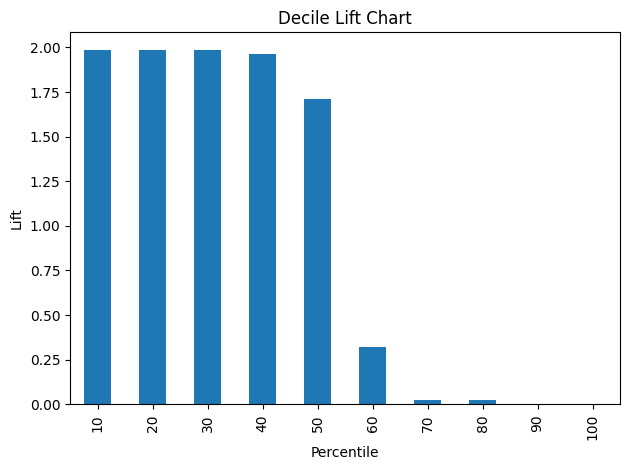

In [ ]:
# Create a DataFrame with predicted probabilities and actual labels
df = pd.DataFrame(data={
    'prob': [p[1] for p in logit_reg.predict_proba(Xtest)],  # Extract the probability of the positive class
    'actual': ytest  # Actual test labels
})
# Sort the DataFrame by predicted probability in descending order
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

# Plot the lift chart using the sorted DataFrame
ax = liftChart(df.actual, labelBars=False)  # `labelBars=False` suppresses labels on the bars in the chart

# Improve layout and display the plot
plt.tight_layout()
plt.show()


Here’s an explanation and breakdown of this code, which generates a lift chart for evaluating the performance of the logistic regression model:

```python
# Create a DataFrame with predicted probabilities and actual labels
df = pd.DataFrame(data={
    'prob': [p[1] for p in logit_reg.predict_proba(Xtest)],  # Extract the probability of the positive class
    'actual': ytest  # Actual test labels
})
# Sort the DataFrame by predicted probability in descending order
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

# Plot the lift chart using the sorted DataFrame
ax = liftChart(df.actual, labelBars=False)  # `labelBars=False` suppresses labels on the bars in the chart

# Improve layout and display the plot
plt.tight_layout()
plt.show()
```

### Explanation of Each Step:

1. **Data Preparation**:
   - `df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})`:
     - The `predict_proba` method of the logistic regression model (`logit_reg`) returns the probabilities for each class (in this case, `[p[1] for p in logit_reg.predict_proba(Xtest)]` extracts the probability of the positive class).
     - This probability and the actual labels from `ytest` are stored in a new DataFrame, `df`, with columns `'prob'` and `'actual'`.

2. **Sorting**:
   - `df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)`:
     - The DataFrame `df` is sorted in descending order based on the predicted probability (`prob`), so that the instances with the highest predicted probability are at the top.
     - The index is reset after sorting to maintain sequential indexing.

3. **Lift Chart**:
   - `ax = liftChart(df.actual, labelBars=False)`:
     - The `liftChart` function (assuming it’s defined or imported from a library) plots the lift chart, which visualizes the model’s ability to capture the positive class effectively. It shows how well the model’s predictions perform compared to a random selection.

4. **Displaying the Plot**:
   - `plt.tight_layout()` ensures there is appropriate spacing in the layout.
   - `plt.show()` displays the final lift chart.

### Purpose of a Lift Chart:
A lift chart helps assess the model’s effectiveness by showing how much better the model performs in identifying positive cases than a random model. This is particularly useful in cases where identifying a certain class (e.g., high-risk customers) is critical. The chart ranks instances by their predicted probability and provides insights into the model’s effectiveness at various probability thresholds.